## Chapter 05. 구매 요인 분석 (Decision Tree)

### 01. 분석의 목적
- Decision Tree 모델을 통하여 온라인 경매 아이템 판매여부를 예측하고 각 변수의 영향도를 확인
- Binary Classification에 속함

### 02. 모듈, 데이터 로딩 및 데이터 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv("./data/galaxy.csv")

data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1179 non-null   object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [4]:
data.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


<AxesSubplot:xlabel='startprice', ylabel='Density'>

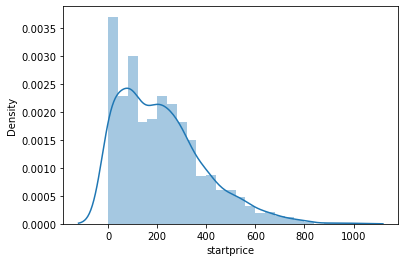

In [5]:
sns.distplot(data["startprice"])

<AxesSubplot:xlabel='charCountDescription', ylabel='Density'>

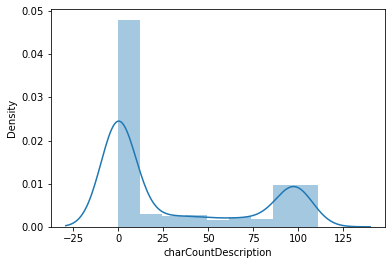

In [6]:
sns.distplot(data["charCountDescription"])

<AxesSubplot:xlabel='productline', ylabel='startprice'>

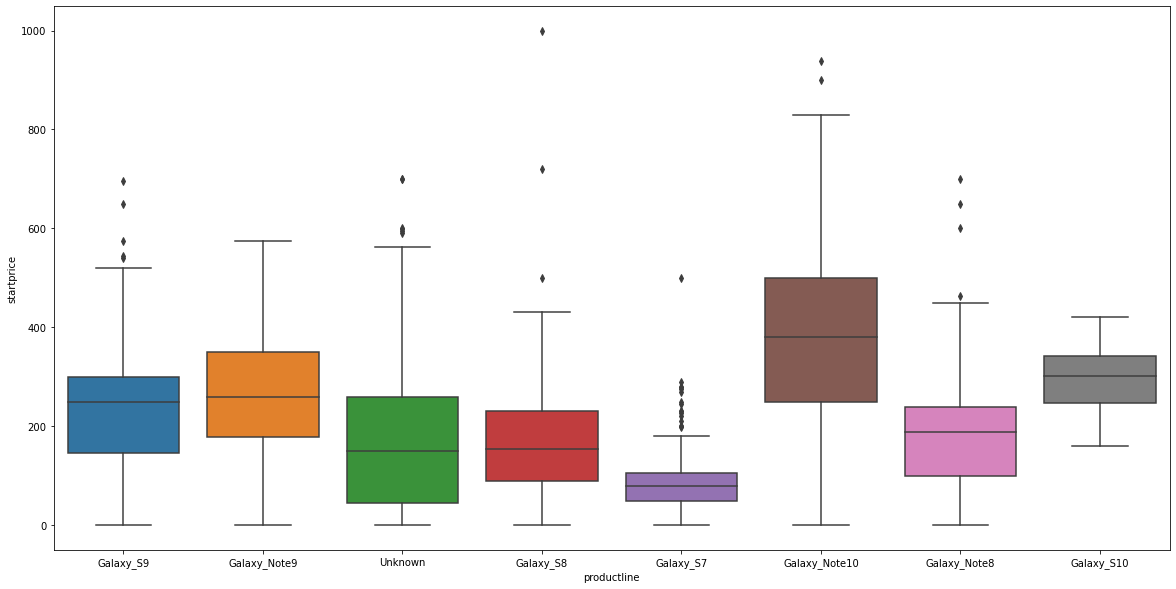

In [7]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="productline", y="startprice", data=data)

### 03. Missing Value 확인 및 처리

In [8]:
data.isna().sum() / len(data)

BuyItNow                0.000000
startprice              0.000000
carrier                 0.206061
color                   0.399327
productline             0.000000
noDescription           0.000000
charCountDescription    0.000000
upperCaseDescription    0.000000
sold                    0.000000
dtype: float64

- Text Data인 Column의 Missing Value 처리
- 방법 1: 하나의 값이 월등하게 많은 경우, 해당 값으로 채워줌
- 방법 2: Unknown 등으로 처리해 Missing Value 그 자체로 가져감

In [9]:
data = data.fillna("Unknown")

data

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,None,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,None,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,None,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,Unknown,Galaxy_S7,no description,96,2,0
1481,0,239.95,None,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,None,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,None,Midnight Black,Galaxy_S7,no description,92,2,1


In [10]:
data["carrier"].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

### 04. 카테고리 변수 처리

In [11]:
data[["carrier", "color", "productline", "noDescription"]].nunique()

carrier          5
color            8
productline      8
noDescription    2
dtype: int64

In [12]:
data["carrier"].value_counts()

None               863
Unknown            306
AT&T               177
Verizon             87
Sprint/T-Mobile     52
Name: carrier, dtype: int64

In [13]:
data["color"].value_counts()

Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: color, dtype: int64

In [14]:
data["productline"].value_counts()

Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: productline, dtype: int64

In [15]:
data["noDescription"].value_counts()

contains description    856
no description          629
Name: noDescription, dtype: int64

- Midnight Black, Black, Aura Black, Prism Black을 따로 나눌 필요가 없다고 판단하여 Black 하나로 나머지를 변환

In [16]:
def black(c):
    if c in ["Midnight Black", "Aura Black", "Prism Black"]:
        return "Black"
    else:
        return c

data["color"] = data["color"].apply(lambda x: black(x))
data["color"].value_counts()

Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: color, dtype: int64

In [17]:
data = pd.get_dummies(data, columns=["carrier", "color", "productline", "noDescription"], drop_first=True)

data

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_None,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Gold,...,color_Unknown,color_White,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_no description
0,0,199.99,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,235.00,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,199.99,100,2,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,1,175.00,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,100.00,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,0,89.50,96,2,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1481,0,239.95,97,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1482,0,329.99,93,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1483,0,89.00,92,2,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### 05. Decision Tree 모델링, 예측, 평가하기, 최적의 트리 만들기 (파라미터 튜닝)

In [18]:
from sklearn.model_selection import train_test_split

X = data.drop("sold", axis=1)
y = data["sold"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [20]:
pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, pred)

0.797979797979798

### 06. 최적의 트리 만들기 (파라미터 튜닝)

In [22]:
for i in range(2, 31):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i, round(accuracy_score(y_test, pred), 4))

2 0.8182
3 0.8215
4 0.8215
5 0.8182
6 0.8081
7 0.8047
8 0.7946
9 0.8047
10 0.8013
11 0.7677
12 0.7609
13 0.7542
14 0.7609
15 0.771
16 0.7744
17 0.7778
18 0.7609
19 0.7542
20 0.7778
21 0.7542
22 0.7441
23 0.7542
24 0.7643
25 0.7643
26 0.7542
27 0.7508
28 0.7576
29 0.7407
30 0.7475


- max_depth가 3에서 고점을 찍고 점점 떨어지는 것을 확인

In [23]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8215488215488216

In [24]:
confusion_matrix(y_test, pred)

array([[148,  13],
       [ 40,  96]])

### 06. Tree Plot과 함께 Decision Tree 원리 이해

[Text(558.0, 475.65000000000003, 'X[0] <= 0.5\ngini = 0.497\nsamples = 1188\nvalue = [638, 550]'),
 Text(279.0, 339.75, 'X[1] <= 208.495\ngini = 0.357\nsamples = 659\nvalue = [506, 153]'),
 Text(139.5, 203.85000000000002, 'X[17] <= 0.5\ngini = 0.442\nsamples = 240\nvalue = [161, 79]'),
 Text(69.75, 67.94999999999999, 'gini = 0.43\nsamples = 230\nvalue = [158, 72]'),
 Text(209.25, 67.94999999999999, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(418.5, 203.85000000000002, 'X[3] <= 5.5\ngini = 0.291\nsamples = 419\nvalue = [345, 74]'),
 Text(348.75, 67.94999999999999, 'gini = 0.319\nsamples = 367\nvalue = [294, 73]'),
 Text(488.25, 67.94999999999999, 'gini = 0.038\nsamples = 52\nvalue = [51, 1]'),
 Text(837.0, 339.75, 'X[1] <= 142.475\ngini = 0.375\nsamples = 529\nvalue = [132, 397]'),
 Text(697.5, 203.85000000000002, 'X[1] <= 59.995\ngini = 0.216\nsamples = 332\nvalue = [41, 291]'),
 Text(627.75, 67.94999999999999, 'gini = 0.108\nsamples = 210\nvalue = [12, 198]'),
 Text(767.25, 67

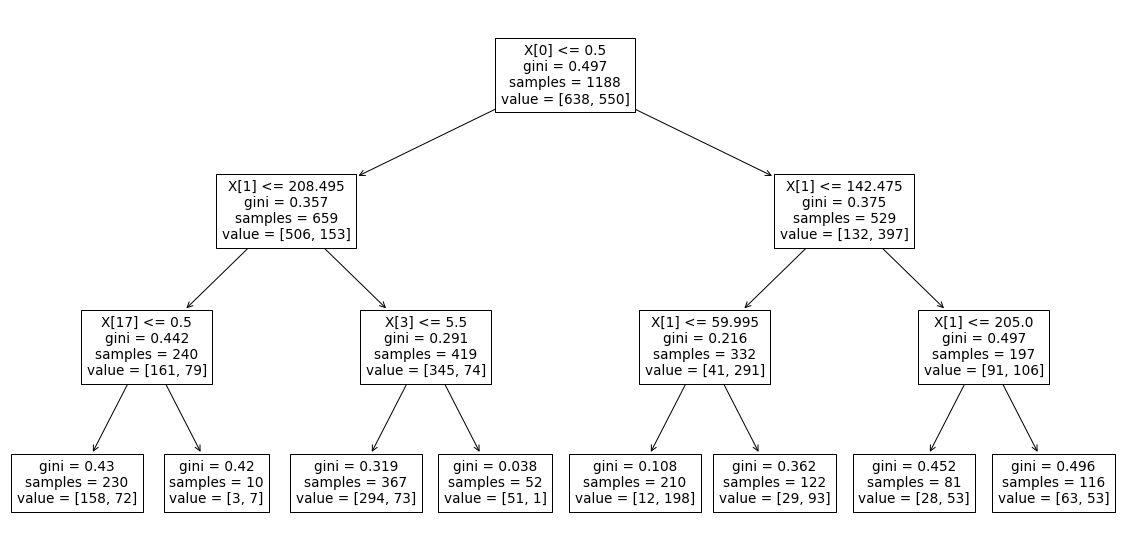

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model)

- Decision Tree는 여려 변수 중 가장 중요하다고 생각하는 변수와 특정 기준점을 잡아 Yes or No로 나누는 것
- 가장 아래에 위차한 노드들은 0 또는 1에 치우치도록 분류가 됨
- 각 노드 첫 줄에서 볼 수 있는 X[n]은 n번째 독립변수를 뜻하며, 해당 부등식을 기준으로 Yes or No를 나눔
- X[n]에 들어가는 변수는 다음 노드에서도 반복하여 등장할 수 있음
- gini는 그 안에 있는 데이터가 얼마나 편향적으로 구성되어있는지, 즉 얼마나 깨끗하게 분류되어 있는지를 나타냄
- gini는 0 이상 0.5 이하의 값을 가지며, 0.5일 때 반반으로 구성되어 있음을 의미하므로 0일때 가장 깨끗하게 분류된 것
- 한 노드의 gini가 0이 되도록 만들면, 해당 노드는 분류를 멈추고 나머지 노드만 계속 진행 

[Text(558.0, 475.65000000000003, 'BuyItNow <= 0.5\n0.497\n1188\n[638, 550]'),
 Text(279.0, 339.75, 'startprice <= 208.495\n0.357\n659\n[506, 153]'),
 Text(139.5, 203.85000000000002, 'productline_Galaxy_S9 <= 0.5\n0.442\n240\n[161, 79]'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'upperCaseDescription <= 5.5\n0.291\n419\n[345, 74]'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'startprice <= 142.475\n0.375\n529\n[132, 397]'),
 Text(697.5, 203.85000000000002, 'startprice <= 59.995\n0.216\n332\n[41, 291]'),
 Text(627.75, 67.94999999999999, '\n  (...)  \n'),
 Text(767.25, 67.94999999999999, '\n  (...)  \n'),
 Text(976.5, 203.85000000000002, 'startprice <= 205.0\n0.497\n197\n[91, 106]'),
 Text(906.75, 67.94999999999999, '\n  (...)  \n'),
 Text(1046.25, 67.94999999999999, '\n  (...)  \n')]

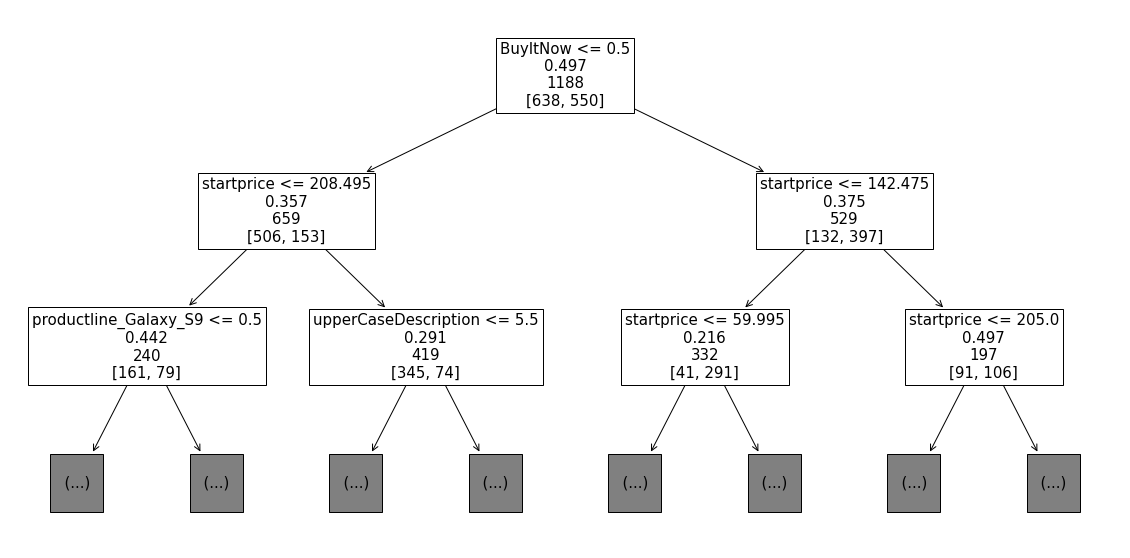

In [26]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, fontsize=15, label=None, max_depth=2)

### 07. Decision Tree vs Logistic Regression
- Non Parametric vs Parametric (Parametric이란 어떠한 특성을 전제로 하는 것, Logistic은 X와 y가 어느정도 선형관계임을 전제)
- Feature Power X vs Feature Power O (Decision Tree도 Feature Importance를 보여주긴 하나, Logistic의 coef처럼 디테일한 정보는 아님)
- Categorical Value O vs Categorical Value X (Decision Tree는 카테고리 변수도 받을 수 있으나, 다른 알고리즘에서 못받는 경우가 많아 습관적으로 선처리하는 것이 좋음)